In [10]:
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [13]:
# 데이터 정규화

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

modelpath = "./model_optimization/mnist_DNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [16]:
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.2, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/100
1474/1500 [============================>.] - ETA: 0s - loss: 1.8747 - accuracy: 0.4731
Epoch 1: val_loss improved from inf to 1.37889, saving model to ./model_optimization\mnist_DNN.hdf5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.8674 - accuracy: 0.4766 - val_loss: 1.3789 - val_accuracy: 0.7132
Epoch 2/100
1495/1500 [============================>.] - ETA: 0s - loss: 1.0586 - accuracy: 0.7802
Epoch 2: val_loss improved from 1.37889 to 0.78581, saving model to ./model_optimization\mnist_DNN.hdf5
1500/1500 [==============================] - 2s 2ms/step - loss: 1.0577 - accuracy: 0.7805 - val_loss: 0.7858 - val_accuracy: 0.8384
Epoch 3/100
1482/1500 [============================>.] - ETA: 0s - loss: 0.7012 - accuracy: 0.8388
Epoch 3: val_loss improved from 0.78581 to 0.57734, saving model to ./model_optimization\mnist_DNN.hdf5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7000 - accuracy: 0.8390 - val_loss: 0.5773 - val_accuracy: 0.8

In [17]:
score = model.evaluate(X_test, y_test)
print(f"accuracy : {round(score[1],2)}")

313/313 [==============================] - 0s 856us/step - loss: 0.1244 - accuracy: 0.9634
accuracy : 0.96


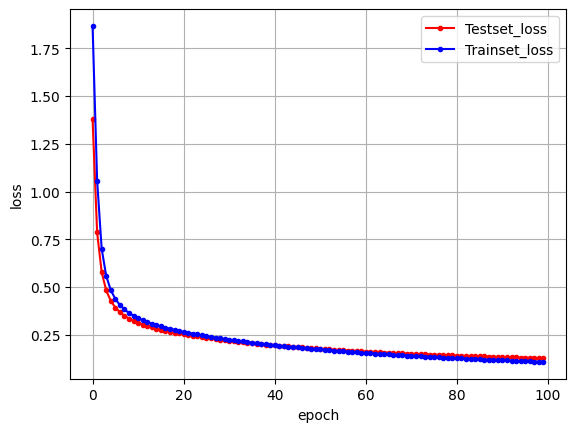

In [18]:
import numpy as np
import matplotlib.pyplot as plt

y_val_loss = history.history["val_loss"]
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_val_loss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()